<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/Sentiment-Analysis/blob/main/Sentiment%20Analysis%20Financial%20News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis for Financial News**

**Background**


The dataset provides sentiment analysis of financial news headlines as seen through the eyes of a typical individual retail investor. In other words, it offers insights into how everyday people who invest in the financial markets perceive and react to the news headlines related to finance. This dataset is valuable for understanding the sentiments and emotions expressed by retail investors in response to various financial news articles and can be used for research, analysis, and decision-making in the field of finance.


This experiment focuses on conducting sentiment analysis using a convolutional neural network (CNN) applied to financial news. The main goal of this experiment was to categorize news articles as either having a positive or negative sentiment based on their content. To accomplish this, the experiment utilized a dataset composed of various financial news articles.

**Introduction**


Sentiment analysis has gained significant importance in our rapidly evolving digital world. One field where sentiment analysis holds particular significance is financial news, where timely and accurate information can be the key to success. In recent years, convolutional neural networks (CNNs) have emerged as a potent tool for sentiment analysis due to their capability to learn intricate patterns and relationships within extensive datasets. Specifically in the realm of financial news, employing CNNs for sentiment analysis has become a promising avenue for research. This approach has the potential to enhance financial decision-making and formulate more effective trading strategies. In this experiment, we will delve into the fundamentals of sentiment analysis and its application to financial news using CNNs.

Literature Review Paraphrase:
CNNs are a widely used type of deep learning model employed in tasks such as image and video processing, natural language processing, and speech recognition. Here are some of the advantages and disadvantages associated with the use of CNNs:

Advantages:

- Highly proficient in image recognition: CNNs excel in accurately categorizing and segmenting images, even when they are intricate and feature multiple objects or backgrounds.
- Efficient with extensive datasets: CNNs can be trained on large datasets without succumbing to overfitting, making them valuable for big data applications.
- Resilient to image variations: CNNs can identify images even when they are rotated, scaled, or partially obscured, rendering them suitable for real-world applications.
- Fine-tuning capabilities: CNNs can be fine-tuned to perform well on specific tasks like object detection, face recognition, or speech recognition.
- utomated feature extraction: CNNs can autonomously extract pertinent features from images, lessening the need for manual feature engineering.
Disadvantages:

Demand substantial datasets: CNNs necessitate substantial amounts of labeled data for effective training, which can be a costly and time-consuming endeavor.
- Computationally intensive: Training CNNs can be computationally demanding and require potent hardware like GPUs or TPUs.
- Challenging interpretability: CNNs are often regarded as "black box" models because understanding how they make predictions can be challenging, making them unsuitable for applications where interpretability is crucial.
- Hyperparameter sensitivity: Achieving optimal performance with CNNs requires meticulous tuning of hyperparameters, which can be a complex and time-consuming task.
- Limited to structured data: CNNs are most suitable for structured data, such as images or speech signals, and may not be well-suited for other data types like unstructured text data.

In [1]:
!pip install contractions

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('all-data.csv', delimiter=',', encoding='latin-1', header=None)
df = df.rename(columns=lambda x: ['Sentiment', 'Sentence'][x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Sentence   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [3]:
df = df[['Sentence', 'Sentiment']]
df.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


**Exploratory Data Analysis**

In [4]:
df = df[df.Sentiment != "neutral"]
df.head()

,Sentence,Sentiment
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
6,"For the last quarter of 2010 , Componenta 's n...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 2 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   1967 non-null   object
 1   Sentiment  1967 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


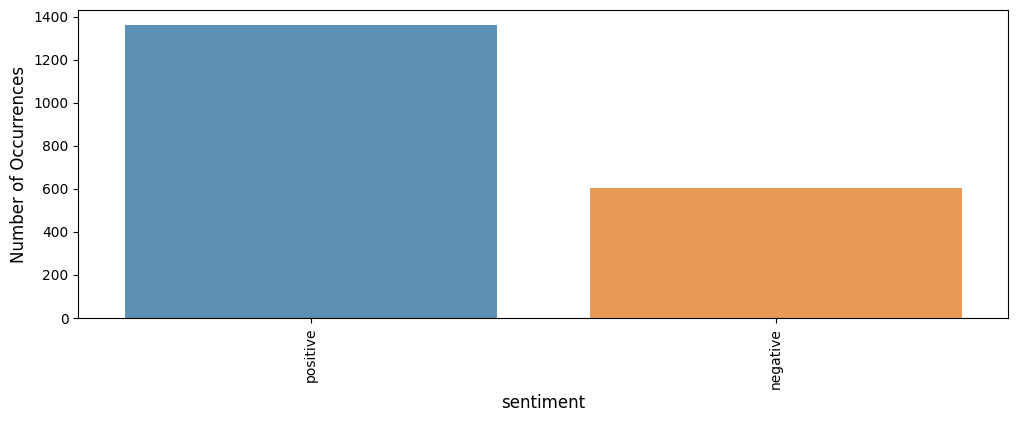

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = df['Sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

**Data Preparation**

In [7]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [8]:
import re
import nltk
import tqdm
import unicodedata
import contractions

from nltk.tokenize import word_tokenize

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)

  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [11]:
import time

start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")


Execution time: 5.173683166503906e-05 seconds


In [14]:
df.head()

,Sentence,Sentiment
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
6,"For the last quarter of 2010 , Componenta 's n...",positive


**Handling Imbalance (Oversampling)**

In [15]:
from sklearn.utils import resample
# Separate majority and minority classes in training data for upsampling
data_majority = df[df['Sentiment'] == "positive"]
data_minority = df[df['Sentiment'] == "negative"]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balance = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
print("After upsampling\n",df_balance.Sentiment.value_counts(),sep = "")

majority class before upsample: (1363, 2)
minority class before upsample: (604, 2)
After upsampling
positive    1363
negative    1363
Name: Sentiment, dtype: int64


**Using SMOTE**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Step 1: Preprocess the text data (e.g., tokenize, remove stopwords, etc.)
# Your pre-processing code here

# Step 2: Convert text data to numerical features (e.g., TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['Sentence'])

# Step 3: Apply SMOTE to the numerical features
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df['Sentiment'])

# Create a new DataFrame with the TF-IDF matrix and 'Sentiment' column
df_balance = pd.DataFrame({'Sentence': list(X_resampled), 'Sentiment': y_resampled})

# Display new class counts
print("After SMOTE\n", df_balance['Sentiment'].value_counts(), sep="")


After SMOTE
negative    1363
positive    1363
Name: Sentiment, dtype: int64


**Using ADASYN**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import ADASYN

# Step 1: Preprocess the text data (e.g., tokenize, remove stopwords, etc.)
# Your pre-processing code here

# Step 2: Convert text data to numerical features (e.g., TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['Sentence'])

# Step 3: Apply ADASYN to the numerical features
adasyn = ADASYN(random_state=123)
X_resampled, y_resampled = adasyn.fit_resample(X_tfidf, df['Sentiment'])

# Create a new DataFrame with the TF-IDF matrix and 'Sentiment' column
df_balance = pd.DataFrame({'Sentence': list(X_resampled), 'Sentiment': y_resampled})

# Display new class counts
print("After ADASYN\n", df_balance['Sentiment'].value_counts(), sep="")


After ADASYN
negative    1440
positive    1363
Name: Sentiment, dtype: int64


**Splitting the data**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Sentence, df.Sentiment, test_size=0.1, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1770,), (197,), (1770,), (197,))

**Tokenizer**


In the realm of sentiment analysis for financial news or any text-based analysis, the "Tokenizer" assumes a pivotal role within natural language processing (NLP). Its primary function is to disassemble text documents, such as financial news headlines or articles, into individual words or tokens. Tokenization serves as a foundational step in NLP and includes tasks like segmenting text into words, eliminating punctuation and special characters, standardizing text to lowercase, and, in some cases, filtering out common stopwords. Its ultimate goal is to structure and prepare text data for subsequent analysis. Post-tokenization, text is represented as a sequence of tokens, which can be utilized as input for machine learning or deep learning models, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), to facilitate sentiment classification. The selection of the appropriate tokenizer and its configuration significantly impacts the quality of tokenization and consequently influences the overall effectiveness of sentiment analysis models. Thus, choosing the right tokenizer is a critical aspect of NLP projects.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [22]:
vocab = len(token.index_word) + 1
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

Vocabulary size=5231
Number of Documents=1770


**Sequence**

 In sentiment analysis, the order of words in a sentence is analyzed to discern the expressed sentiment. For machine translation, sequences of words in one language are transformed into sequences in another language. Named entity recognition involves identifying and categorizing entities within text, often by detecting sequences of words that represent entities. In speech recognition, spoken words are converted into text sequences. Additionally, text generation models produce coherent sentences or paragraphs by generating sequences of words.

In the domain of NLP, the order and arrangement of tokens within a sequence are pivotal for comprehending the meaning and context of the text. Specialized models like recurrent neural networks (RNNs) and transformers are designed to process and analyze such sequences effectively, facilitating a wide array of tasks related to natural language understanding and generation.

In [23]:
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

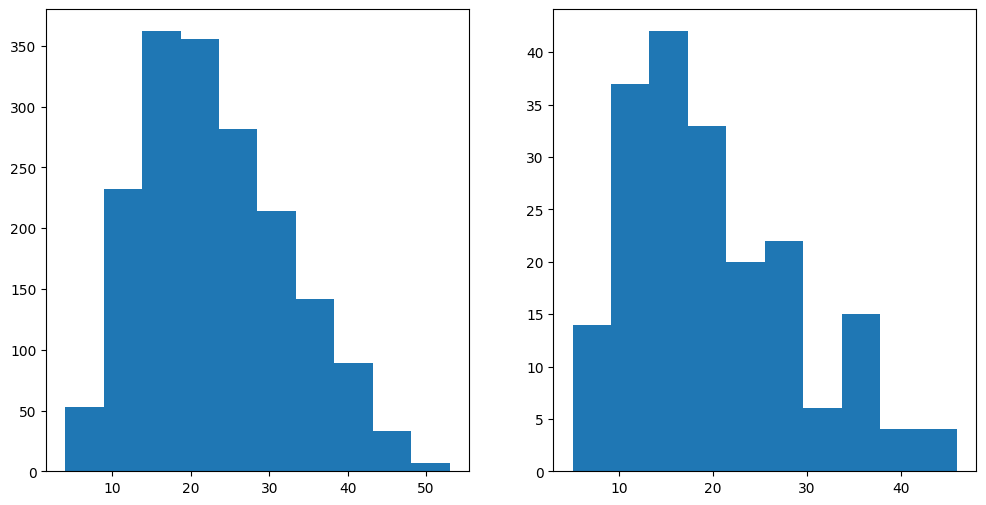

In [24]:
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#padding
MAX_SEQUENCE_LENGTH = 30
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_train.shape, X_test.shape

((1770, 30), (197, 30))

**Encoding Labels**

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [27]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**Modelling**

In [28]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(64,8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           1569600   
                                                                 
 conv1d (Conv1D)             (None, 23, 64)            153664    
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 dense (Dense)               (None, 11, 8)             520       
                                                                 
 dropout_1 (Dropout)         (None, 11, 8)             0         
                                                        

In [29]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

epochs = 100
batch_size = 4

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_model_cnn1d.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/100
399/399 [==============================] - ETA: 0s - loss: 0.6526 - accuracy: 0.6886
Epoch 1: val_accuracy improved from -inf to 0.73446, saving model to ./best_model/best_model_cnn1d.h5
399/399 [==============================] - 16s 36ms/step - loss: 0.6526 - accuracy: 0.6886 - val_loss: 0.6181 - val_accuracy: 0.7345
Epoch 2/100
398/399 [============================>.] - ETA: 0s - loss: 0.6357 - accuracy: 0.6903
Epoch 2: val_accuracy did not improve from 0.73446
399/399 [==============================] - 11s 28ms/step - loss: 0.6356 - accuracy: 0.6905 - val_loss: 0.6096 - val_accuracy: 0.7345
Epoch 3/100
397/399 [============================>.] - ETA: 0s - loss: 0.6210 - accuracy: 0.6908
Epoch 3: val_accuracy did not improve from 0.73446
399/399 [==============================] - 11s 28ms/step - loss: 0.6211 - accuracy: 0.6905 - val_loss: 0.6011 - val_accuracy: 0.7345
Epoch 4/100
399/399 [==============================] - ETA: 0s - loss: 0.6048 - accuracy: 0.6937
Epoch 4: 

**Model Evaluation**

Accuracy

In [30]:
from keras.models import load_model

saved_model = load_model('./best_model/best_model_cnn1d.h5')
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

7/7 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.8579
Train: 98.14%, Test: 85.79%


**Overfitting**

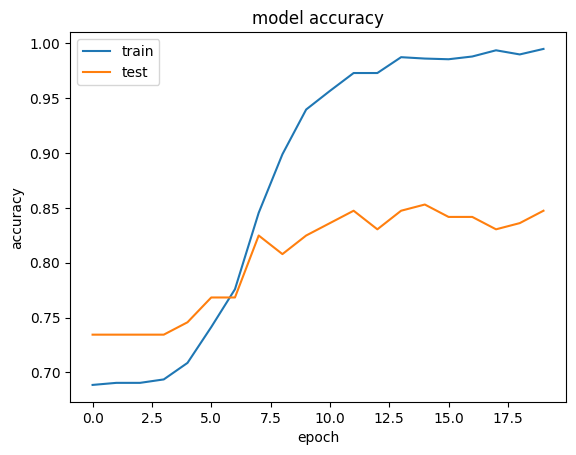

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

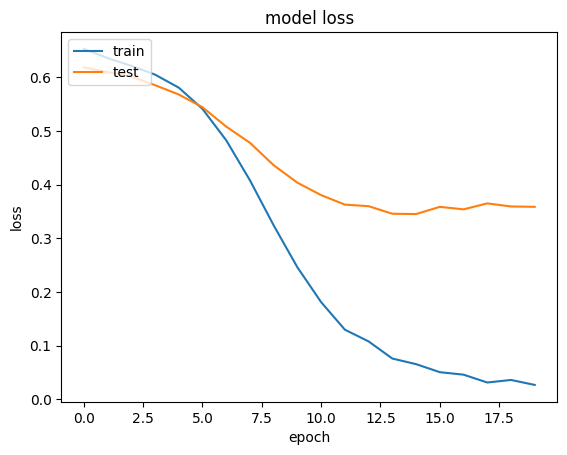

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix**

In [33]:
def predictions(x):
    prediction_probs = model.predict(x)
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    return predictions

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels = ['positive', 'negative']
print("CNN 1D Accuracy: %.2f%%" % (accuracy_score(y_test, predictions(X_test))*100))
print("CNN 1D Precision: %.2f%%" % (precision_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D Recall: %.2f%%" % (recall_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D f1_score: %.2f%%" % (f1_score(y_test, predictions(X_test), average="macro")*100))
print('================================================\n')
print(classification_report(y_test, predictions(X_test)))
pd.DataFrame(confusion_matrix(y_test, predictions(X_test)), index=labels, columns=labels)

7/7 [==============================] - 1s 18ms/step
CNN 1D Accuracy: 87.82%
7/7 [==============================] - 0s 12ms/step
CNN 1D Precision: 87.57%
7/7 [==============================] - 0s 17ms/step
CNN 1D Recall: 84.09%
7/7 [==============================] - 0s 22ms/step
CNN 1D f1_score: 85.48%

7/7 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        64
           1       0.88      0.95      0.91       133

    accuracy                           0.88       197
   macro avg       0.88      0.84      0.85       197
weighted avg       0.88      0.88      0.88       197

7/7 [==============================] - 0s 12ms/step


,positive,negative
positive,47,17
negative,7,126


ROC/AUC

In [35]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

7/7 [==============================] - 0s 13ms/step
model AUC score: 84.09%


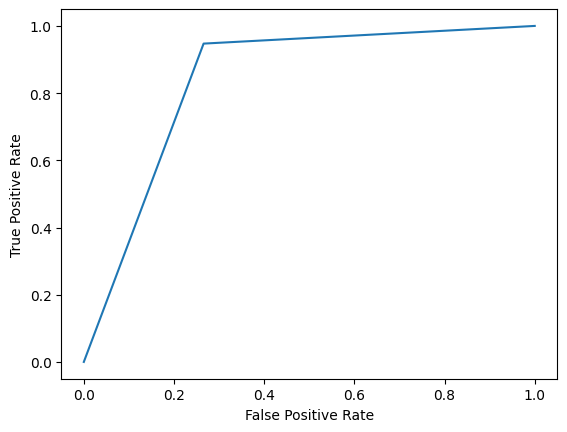

In [36]:
plot_roc_curve(y_test, predictions(X_test))
print("model AUC score: %.2f%%" % (roc_auc_score(y_test, predictions(X_test))*100))

**Evaluation Result**

The findings from the sentiment analysis experiment, utilizing a convolutional neural network (CNN) for analyzing financial news, displayed promising results. The CNN model achieved an accuracy rate of 87.82%, signifying that it accurately categorized 87.82% of the news articles as either exhibiting a positive or negative sentiment.

The model's precision stood at 87.57%, indicating that among all the articles classified as positive or negative, 87.57% were correctly identified. Furthermore, the model's recall reached 84.09%, denoting that out of all the articles that genuinely conveyed positive or negative sentiment, the model accurately classified 84.09% of them.

The F1-score of the model registered at 85.48%, which serves as a weighted average of both precision and recall, offering a comprehensive measure of the model's performance. Taken together, these outcomes imply that employing the CNN approach for sentiment analysis in the context of financial news proves effective and could serve as a valuable tool for enhancing financial decision-making and refining trading strategies.

**Conclusion**

The outcomes of the sentiment analysis experiment using a convolutional neural network (CNN) applied to financial news have displayed encouraging results, featuring high levels of accuracy, precision, recall, and F1-score. Nevertheless, there is room for enhancing the model's performance by integrating it with other deep learning architectures, such as the gated recurrent unit (GRU) or long short-term memory (LSTM). By amalgamating the strengths of diverse models, we can bolster the model's capacity to grasp and uncover more intricate patterns within the data, ultimately leading to improved sentiment analysis outcomes. Additionally, forthcoming experiments may investigate the utilization of larger and more diverse datasets, as well as the inclusion of external factors like market trends and economic indicators, to augment both the accuracy and practical applicability of the model. In general, the positive outcomes attained in this experiment establish a strong groundwork for future research endeavors in the domain of sentiment analysis, where the focus will be on utilizing hybrid deep learning models to analyze financial news.